In [6]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

<font size = '5' style="font-weight:bold">Naive Bayes Classifier Using 5 Classes (1,2,3,4 and 5 Rating)</font>

In [8]:
# Importing the datasets
reviews = pd.read_csv('reviews_restaurants_text.csv')
reviews['text'] = reviews['text'].str[2:-2]

#Undersampling of the dataset to get a balanced dataset
review1 = reviews[reviews['stars'] == 1][0:12000]
review2 = reviews[reviews['stars'] == 2][0:7000]
review3 = reviews[reviews['stars'] == 3][0:12000]
review4 = reviews[reviews['stars'] == 4][0:12000]
review5 = reviews[reviews['stars'] == 5][0:12000]
frames = [review1, review2, review3,review4,review5]
reviews = pd.concat(frames)

In [9]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x = reviews['text']
y = reviews['stars']

In [10]:
# Text preprocessing
import string
def text_preprocessing(text):
    no_punctuation = [ch for ch in text if ch not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [w for w in no_punctuation.split() if w.lower() not in stopwords.words('english')]


In [11]:
# Vectorization
# Converting each review into a vector using bag-of-words approach

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=text_preprocessing).fit(x)

In [12]:
x = vector.transform(x)

In [13]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [14]:
# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [15]:
# Testing our model on the test set
Y_pred = classifier.predict(X_test)

<font size = '5' style="font-weight:bold">Classification Report</font>

In [16]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

[[1924  143  265   36   27]
 [ 516  171  610   71   20]
 [ 299  102 1394  477  115]
 [  84   20  481 1156  676]
 [  49    8  108  556 1692]]


             precision    recall  f1-score   support

          1       0.67      0.80      0.73      2395
          2       0.39      0.12      0.19      1388
          3       0.49      0.58      0.53      2387
          4       0.50      0.48      0.49      2417
          5       0.67      0.70      0.68      2413

avg / total       0.56      0.58      0.56     11000



<font size = '5' style="font-weight:bold">Accuracy of the model</font>

In [17]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.5760909090909091

<font size = '5' style="font-weight:bold">Precision and Recall of the model</font>

In [18]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(Y_test, Y_pred, average='weighted')))
print ('Recall: ' + str(recall_score(Y_test, Y_pred, average='weighted')))

Precision: 0.557632764578
Recall: 0.576090909091


<font size = '5' style="font-weight:bold">Confusion Matrix of the model</font>

In [19]:
# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1924  143  265   36   27]
 [ 516  171  610   71   20]
 [ 299  102 1394  477  115]
 [  84   20  481 1156  676]
 [  49    8  108  556 1692]]
Normalized confusion matrix
[[ 0.8   0.06  0.11  0.02  0.01]
 [ 0.37  0.12  0.44  0.05  0.01]
 [ 0.13  0.04  0.58  0.2   0.05]
 [ 0.03  0.01  0.2   0.48  0.28]
 [ 0.02  0.    0.04  0.23  0.7 ]]


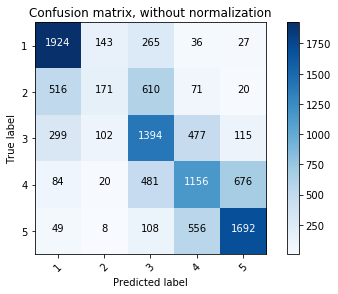

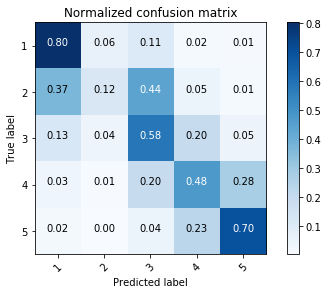

In [20]:
from sklearn import metrics
class_names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<font size = '5' style="font-weight:bold">Naive Bayes Classifier Using 2 Classes (1 and 5 Rating: Positive & Negative Reviews)</font>

In [21]:
# Importing the datasets
reviews = pd.read_csv('reviews_restaurants_text.csv')
reviews['text'] = reviews['text'].str[2:-2]

# Reducing the dataset to 2 classes i.e 1 and 5 star rating
reviews['stars'][reviews.stars == 3] = 1
reviews['stars'][reviews.stars == 2] = 1
reviews['stars'][reviews.stars == 4] = 5

#Undersampling of the dataset to get a balanced dataset
review1 = reviews[reviews['stars'] == 1]
review5 = reviews[reviews['stars'] == 5][0:34062]
frames = [review1, review5]
reviews = pd.concat(frames)

In [22]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
x = reviews['text']
y = reviews['stars']

In [23]:
# Vectorization
# Converting each review into a vector using bag-of-words approach

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=text_preprocessing).fit(x)

In [24]:
x = vector.transform(x)

In [26]:
# Spitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [27]:
# Building Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
# Testing our model on the test set
Y_pred = classifier.predict(X_test)

<font size = '5' style="font-weight:bold">Classification Report</font>

In [29]:
# Evaluating the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

[[5913  788]
 [ 779 6145]]


             precision    recall  f1-score   support

          1       0.88      0.88      0.88      6701
          5       0.89      0.89      0.89      6924

avg / total       0.88      0.88      0.88     13625



<font size = '5' style="font-weight:bold">Accuracy of the model</font>

In [30]:
# Accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.88499082568807341

<font size = '5' style="font-weight:bold">Precision and Recall of the model</font>

In [31]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(Y_test, Y_pred, average='weighted')))
print ('Recall: ' + str(recall_score(Y_test, Y_pred, average='weighted')))

Precision: 0.884989010271
Recall: 0.884990825688


<font size = '5' style="font-weight:bold">Confusion Matrix of the model</font>

Confusion matrix, without normalization
[[5913  788]
 [ 779 6145]]
Normalized confusion matrix
[[ 0.88  0.12]
 [ 0.11  0.89]]


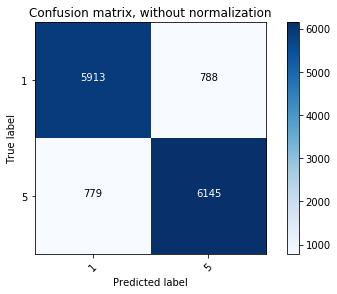

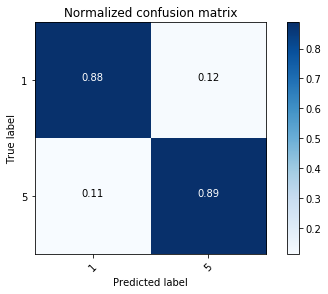

In [32]:
class_names = ['1','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()